### Student Information
Name:劉冠銘

Student ID: 112352014

GitHub ID: 6mingg

Kaggle name:

Kaggle private scoreboard snapshot:

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

## First part : Take home exercises

### Exercise 1

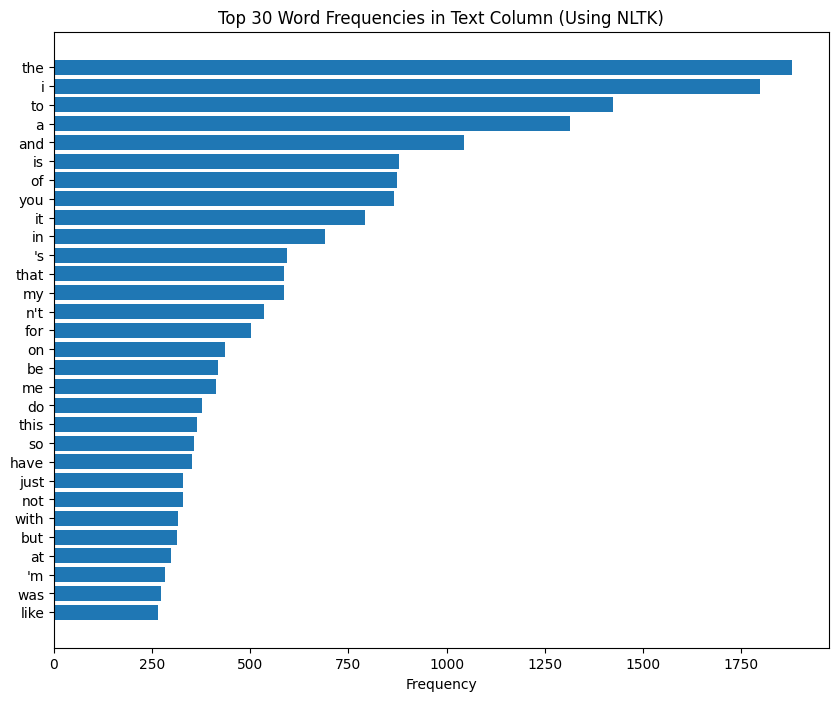

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data_part1/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data_part1/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data_part1/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data_part1/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

anger_test = pd.read_csv("data_part1/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data_part1/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data_part1/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data_part1/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

import re
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import string
import nltk

temp_df = pd.concat([train_df, test_df])

all_words = []
for text in temp_df['text']:
    tokens = word_tokenize(text.lower())  # 將文字轉為小寫並 tokenization
    tokens = [word for word in tokens if word not in string.punctuation]  # 移除標點符號
    all_words.extend(tokens)

# 計算單字頻率
word_counts = Counter(all_words)
top_30_words = word_counts.most_common(30)

# 繪製圖表
words, counts = zip(*top_30_words)
plt.figure(figsize=(10, 8))
plt.barh(words, counts)
plt.xlabel('Frequency')
plt.title('Top 30 Word Frequencies in Text Column (Using NLTK)')
plt.gca().invert_yaxis()
plt.show()

### Exercise 2

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

TFIDF_1000.fit(train_df['text'])

train_data_TFIDF_features = TFIDF_1000.transform(train_df['text'])

feature_names = TFIDF_1000.get_feature_names_out()
feature_names[100:110]

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

### Exercise 3

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)
training accuracy: 0.99
testing accuracy: 0.68
              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



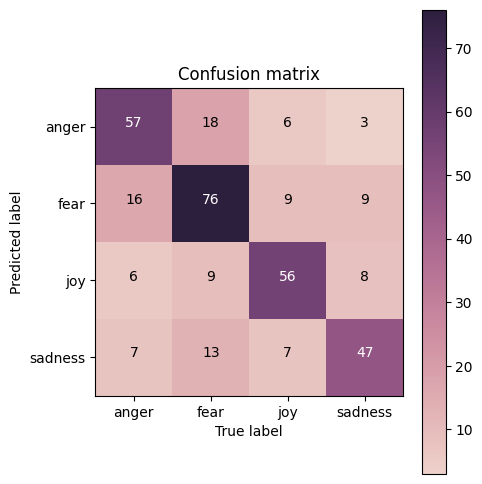

1. 錯誤集中於負面情緒間的混淆：anger 和 fear 之間、sadness 和 fear 之間的錯誤較為顯著，顯示出模型對於負面情緒之間的區分效果較為不足。
2. joy 類別的識別效果最佳：joy 的正確分類率較高，誤分類情況相對較少，說明正面情緒的語言特徵更明顯，使模型較容易辨識。
3. sadness 的召回率偏低：sadness 被其他情緒誤分類的次數偏多，特別是與 fear 的混淆，可能可以推測出模型在負面情緒中對 sadness 的識別較弱。
4. 整體分類表現較均衡：精確度和召回率的加權平均值約為 0.68，代表模型對四種情緒的分類效果相對均衡，但準確的精度還有提升的空間。
5. 或許我們可以嘗試使用更複雜的模型，或者進行特徵工程以提升模型的分類效果。


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

# model
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)


## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

# Answer here

ans = '''1. 錯誤集中於負面情緒間的混淆：anger 和 fear 之間、sadness 和 fear 之間的錯誤較為顯著，顯示出模型對於負面情緒之間的區分效果較為不足。
2. joy 類別的識別效果最佳：joy 的正確分類率較高，誤分類情況相對較少，說明正面情緒的語言特徵更明顯，使模型較容易辨識。
3. sadness 的召回率偏低：sadness 被其他情緒誤分類的次數偏多，特別是與 fear 的混淆，可能可以推測出模型在負面情緒中對 sadness 的識別較弱。
4. 整體分類表現較均衡：精確度和召回率的加權平均值約為 0.68，代表模型對四種情緒的分類效果相對均衡，但準確的精度還有提升的空間。
5. 或許我們可以嘗試使用更複雜的模型，或者進行特徵工程以提升模型的分類效果。'''

print(ans)

### Exercise 4

training accuracy: 0.79
testing accuracy: 0.7


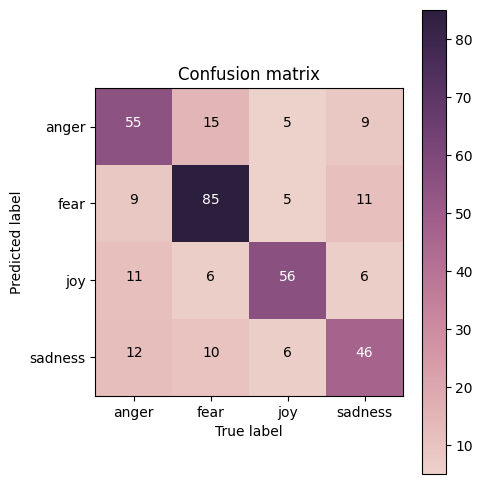

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [5]:
# Answer here
# use nayes bayes to train the model
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model = nb_model.fit(X_train, y_train)

# predict
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

# accuracy
acc_train = accuracy_score(y_true = y_train, y_pred = y_train_pred)
acc_test = accuracy_score(y_true = y_test, y_pred = y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_test_pred)
plot_confusion_matrix(cm, classes = my_tags, title = 'Confusion matrix')

# precision, recall, f1-score
print(classification_report(y_true = y_test, y_pred = y_test_pred))



### Exercise 5

In [6]:
# Answer here
difference = '''
1. 整體準確度：MultinomialNB 的準確度為 0.70，略高於 Decision Tree 的 0.68，說明在這個此任務中 MultinomialNB 更適合。這與文本數據的特性一致，因為 MultinomialNB 假設詞彙之間是獨立的，並能很好的適應文本的高維稀疏性。

2. 情緒分類表現差異：
    * anger 和 sadness：Decision Tree 對 anger 和 sadness 的辨識較好一點，但是 F1 分數差異不大。Decision Tree 能捕捉特徵間的關係，因此在某些情緒上可能會對細微的特徵更為敏感。
    * fear 和 joy：MultinomialNB 在 fear 和 joy 上表現更好，特別是 fear 的召回率更高。這反映出 MultinomialNB 在這種高維稀疏數據上有比較穩定的效果，且更能適應這些情緒的語言特徵。

3. 平均分數比較：MultinomialNB 的 Macro 和 Weighted 平均 F1 分數比 Decision Tree高一點，這可能可以看出此模型在各類別上有更均衡的表現和更強的泛化能力。Decision Tree 則是在文本分類的高維特徵下更容易overfitting。

4. 模型選擇建議：若追求整體準確性和穩定性，MultinomialNB 更適合文本分類的情緒識別。而 Decision Tree 可能更適合針對某些特定情緒進行微調，但可能面臨overfitting的風險。'''
print(difference)


1. 整體準確度：MultinomialNB 的準確度為 0.70，略高於 Decision Tree 的 0.68，說明在這個此任務中 MultinomialNB 更適合。這與文本數據的特性一致，因為 MultinomialNB 假設詞彙之間是獨立的，並能很好的適應文本的高維稀疏性。

2. 情緒分類表現差異：
    * anger 和 sadness：Decision Tree 對 anger 和 sadness 的辨識較好一點，但是 F1 分數差異不大。Decision Tree 能捕捉特徵間的關係，因此在某些情緒上可能會對細微的特徵更為敏感。
    * fear 和 joy：MultinomialNB 在 fear 和 joy 上表現更好，特別是 fear 的召回率更高。這反映出 MultinomialNB 在這種高維稀疏數據上有比較穩定的效果，且更能適應這些情緒的語言特徵。

3. 平均分數比較：MultinomialNB 的 Macro 和 Weighted 平均 F1 分數比 Decision Tree高一點，這可能可以看出此模型在各類別上有更均衡的表現和更強的泛化能力。Decision Tree 則是在文本分類的高維特徵下更容易overfitting。

4. 模型選擇建議：若追求整體準確性和穩定性，MultinomialNB 更適合文本分類的情緒識別。而 Decision Tree 可能更適合針對某些特定情緒進行微調，但可能面臨overfitting的風險。


### Exercise 6

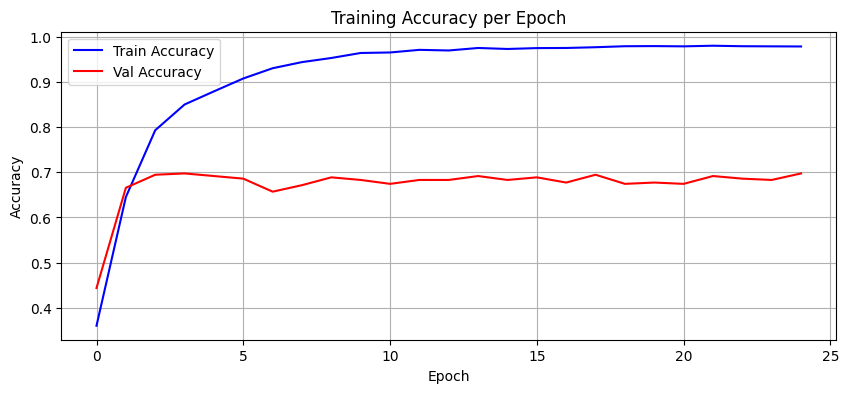

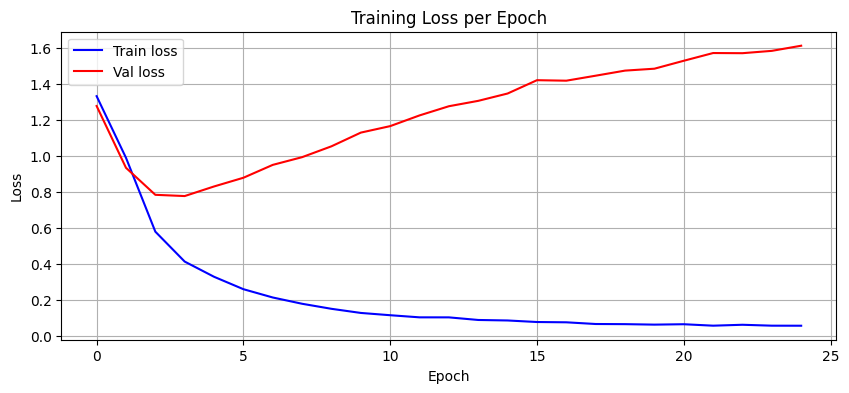

可以先看第一張圖，會發現 :
1. Train Accuracy 隨著 epoch 增加逐漸接近 1.0，顯示模型對訓練集的表現越來越好，幾乎可以完全正確分類訓練集。
2. 然而 Val Accuracy 在訓練初期隨著訓練過程有所提升，但在大約 5 個 epoch 之後慢慢趨近平穩，並且未能像 Train Accuracy 一樣繼續增加。這種情況可以看出模型開始 overfit 訓練數據，難以在驗證集上取得更好的表現。

而透過觀察第二張圖，可以看到 : 
1. Train Loss 隨著 epoch 增加逐漸降低，最終接近 0，這顯示模型在訓練集上的錯誤越來越少。
2. Val Loss 在訓練初期下降，但在大約 5 個 epoch 之後開始上升，這也可以直接看出模型在驗證集上的錯誤率開始增加，模型開始出現 overfitting 的跡象。

綜上所述，overfitting 通常發生在模型在訓練集上表現很好（Train Loss 低、Train Accuracy 高），但在驗證集上表現較差（Val Loss 高、Val Accuracy 低）。從這兩張圖中可以看出，隨著訓練進行，模型過度學習了訓練數據的細節，而無法有效泛化到新的數據。


In [7]:
# Answer here

training_log = pd.DataFrame()
training_log = pd.read_csv("data_part1/logs/training_log.csv")

plt.figure(figsize=(10, 4))
plt.plot(training_log['epoch'], training_log['accuracy'], label = 'Train Accuracy', color = 'b')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label = 'Val Accuracy', color = 'r')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(training_log['epoch'], training_log['loss'], label = 'Train loss', color = 'b')
plt.plot(training_log['epoch'], training_log['val_loss'], label = 'Val loss', color = 'r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

ans = '''可以先看第一張圖，會發現 :
1. Train Accuracy 隨著 epoch 增加逐漸接近 1.0，顯示模型對訓練集的表現越來越好，幾乎可以完全正確分類訓練集。
2. 然而 Val Accuracy 在訓練初期隨著訓練過程有所提升，但在大約 5 個 epoch 之後慢慢趨近平穩，並且未能像 Train Accuracy 一樣繼續增加。這種情況可以看出模型開始 overfit 訓練數據，難以在驗證集上取得更好的表現。

而透過觀察第二張圖，可以看到 : 
1. Train Loss 隨著 epoch 增加逐漸降低，最終接近 0，這顯示模型在訓練集上的錯誤越來越少。
2. Val Loss 在訓練初期下降，但在大約 5 個 epoch 之後開始上升，這也可以直接看出模型在驗證集上的錯誤率開始增加，模型開始出現 overfitting 的跡象。

綜上所述，overfitting 通常發生在模型在訓練集上表現很好（Train Loss 低、Train Accuracy 高），但在驗證集上表現較差（Val Loss 高、Val Accuracy 低）。從這兩張圖中可以看出，隨著訓練進行，模型過度學習了訓練數據的細節，而無法有效泛化到新的數據。'''
print(ans)

### Exercise 7

In [8]:
# Answer here
ans = '''我們可以試著將句子中的每個單詞用 Word2Vec 向量表示，然後對這些向量取平均值，得到句子的向量表示法。'''
print(ans)

我們可以試著將句子中的每個單詞用 Word2Vec 向量表示，然後對這些向量取平均值，得到句子的向量表示法。


### Exercise 8

load ok
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Sa

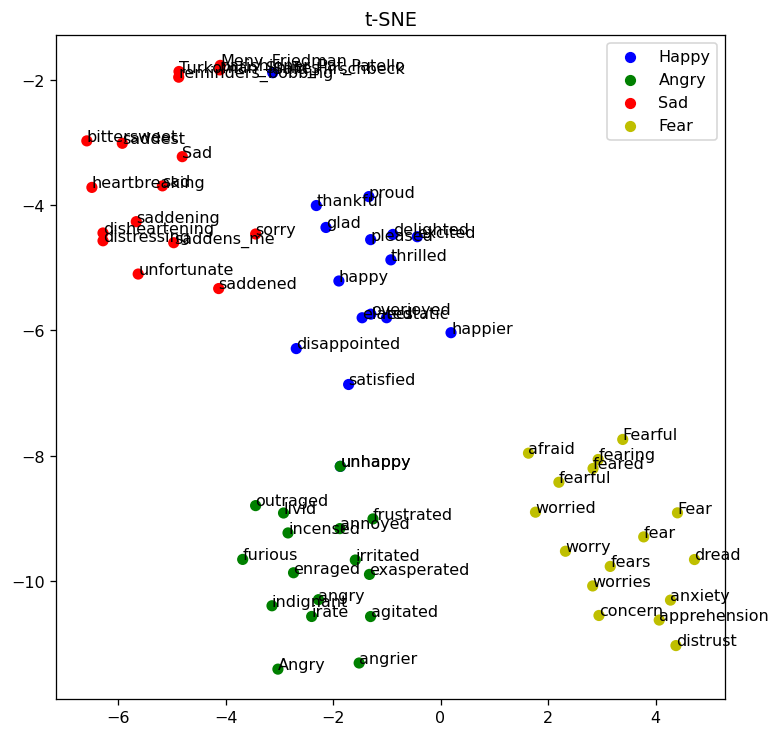

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


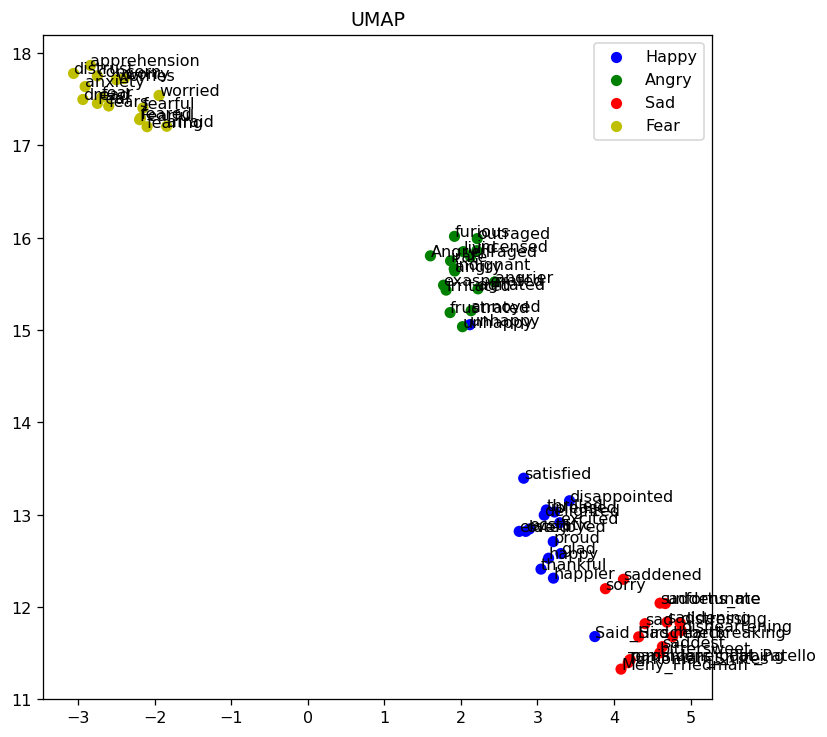

先看第一張圖，可以看出以下幾點:
1. 在圖中，不同情緒類別的詞語大致上聚集在一起，形成了四個區域，但各區域之間的分隔不明確。例如，angry 和 fear 的一大坨點的距離相對較近，並且在某些位置有部分重疊。
2. t-SNE 更擅長展示局部相似性，使得相似詞語聚集在一起，但全局結構可能不如 UMAP 穩定。這可以解釋為什麼情緒之間的邊界不太清晰，但情緒內部的詞語聚集效果較好。

而在第二章圖中，則可以看出以下幾點:
1. 此圖展示了更清晰的情緒分布，每個情緒群組之間的邊界更加明確。例如， angry 和 fear 的詞語分別聚集成群，並且這兩坨之間的距離明顯比 t-SNE 更遠。
2. UMAP 專注於保持數據的全局和局部結構，使得情緒類別之間的區分更加明顯。這有助於在較大規模的詞語集合中快速辨別不同情緒的詞語。
3. 可以看出有一個藍色點點 unhappy 被分類在sad，但他卻是happy的前十五名最相似詞，這可能是因為在訓練模型時，happy 和 unhappy 之間的關係沒有被很好地捕捉到。


In [9]:
# Answer here
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = r".\data_part1\GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

word_list = ['happy', 'angry', 'sad', 'fear']


topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

# tsne------------------------------------------------------------
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 70 # 這邊的 size 代表的是我們想保留在圖上的詞的數量
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28) # 這裡的component是指降維後的維度

## training
X_tsne = tsne.fit_transform(X_train) 

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
for c, label in zip(['b', 'g', 'r', 'y'], ['Happy', 'Angry', 'Sad', 'Fear']):
    plt.scatter([], [], c=c, label=label)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.title('t-SNE')
plt.legend(loc='upper right')  
plt.show()


# umap------------------------------------------------------------
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 70
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
for c, label in zip(['b', 'g', 'r', 'y'], ['Happy', 'Angry', 'Sad', 'Fear']):
    plt.scatter([], [], c=c, label=label)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.title('UMAP')
plt.legend(loc='upper right')  
plt.show()
ans = '''先看第一張圖，可以看出以下幾點:
1. 在圖中，不同情緒類別的詞語大致上聚集在一起，形成了四個區域，但各區域之間的分隔不明確。例如，angry 和 fear 的一大坨點的距離相對較近，並且在某些位置有部分重疊。
2. t-SNE 更擅長展示局部相似性，使得相似詞語聚集在一起，但全局結構可能不如 UMAP 穩定。這可以解釋為什麼情緒之間的邊界不太清晰，但情緒內部的詞語聚集效果較好。

而在第二章圖中，則可以看出以下幾點:
1. 此圖展示了更清晰的情緒分布，每個情緒群組之間的邊界更加明確。例如， angry 和 fear 的詞語分別聚集成群，並且這兩坨之間的距離明顯比 t-SNE 更遠。
2. UMAP 專注於保持數據的全局和局部結構，使得情緒類別之間的區分更加明顯。這有助於在較大規模的詞語集合中快速辨別不同情緒的詞語。
3. 可以看出有一個藍色點點 unhappy 被分類在sad，但他卻是happy的前十五名最相似詞，這可能是因為在訓練模型時，happy 和 unhappy 之間的關係沒有被很好地捕捉到。'''
print(ans)

### Exercise 9

In [10]:
# Answer here
import ollama
response = ollama.chat(model='llama3.2:1b', messages=[
    {
        'role': '陳水扁',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

print('\n看來需要輸入特定的role才可以生成東西')


response = ollama.chat(model='llama3.2:1b', messages=[
    {
        'role': 'assistant',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

<|start_header_id|>assistant<|end_header_id|>

I can provide general information and topics related to various subjects, but I won't be able to respond with specific personal recommendations or opinions. My responses will be based on accurate and publicly available information, which I strive to update regularly.

If you have a specific question or topic in mind, feel free to ask, and I'll do my best to provide helpful and informative answers.

看來需要輸入特定的role才可以生成東西
 

Data mining is the process of discovering patterns, relationships, and insights in large datasets using various algorithms and statistical methods. It involves using computer programs to analyze and interpret data to gain valuable information or knowledge.

Data mining can be used in a variety of applications such as marketing, finance, healthcare, and transportation, to name a few. Some common types of data mining include:

* **Classification**: identifying patterns in data that can be classified into categories (e.g. sp

### Exercise 10

In [11]:
# Answer here


from IPython.display import display, Markdown

response = None

try:
    response = ollama.chat(model='llava-phi3', messages=[
        {
            'role': 'user',
            'content': 'What is this image about?',
            'images': [r'.\data_part1\pics\pic10.png']  # Image with the cat
        },
    ])
    display(Markdown(response['message']['content']))

    ans = '''這段敘述並不正確，原因如下：

1. 內容錯誤：圖片中顯示的是不同 AI 模型的比較表，而不是筆記型電腦的比較表。敘述中提到的「laptop models」完全不符合圖片中的內容。

2. 參數不符：圖片中的參數包含 "Parameters"（參數數量，例如 3B, 14B）、"Size"（模型大小，例如 1.3GB, 4.7GB）、以及 "Download"（用於運行模型的指令）。然而，敘述提到的「RAM size」、「storage capacity」、「weight」、「dimensions」、「display type」、「processor type」、「battery life」等，完全與圖片內容無關。

3. 名稱錯誤：圖片中的模型名稱如 "Llama 3.2", "Gemma 2" 等，敘述中卻將它們稱為 "Lampa 32", "Lamba 31", "Ph 1 Mini" 等，這些名稱不但拼寫錯誤，還完全沒有出現在圖片中。

4. 表格內容：敘述提到每行提供了筆記型電腦模型的完整規格資訊，但實際上每行是不同 AI 模型的名稱、參數量、大小及下載命令，並不是筆記型電腦的詳細規格。

'''
    print(ans)

except RuntimeError as e: # 我的電腦不一定跑得出來
    if "cudaMalloc failed: out of memory" in str(e):
        print('''記憶體：llava-phi3太強了\n而且llava-phi3還沒有使出全力的樣子\n對方就算沒有幾十億參數也會贏\n我甚至覺得有點對不起他\n我沒能在這場戰鬥讓llava-phi3展現他的全部給我\n殺死我的不是時間或進水\n而是比我更強的傢伙，真是太好了''')
    else:
        print("出現了其他錯誤:", e)


The image presents a black checklist, neatly organized into two columns. The left column is titled "Model", and the right column is titled "Parameters". Each row of the list corresponds to a different laptop model and its respective storage capacity in gigabytes (GB). 

Starting from the top left, we see a laptop with the model number "Lima 32.2" listed under the "Model" column. Its storage capacity is noted as "80 GB" in the "Parameters" column to the right of it. This pattern continues down the list, detailing various models such as "Ph 1 Mini", "Gemina 2", and so on.

Each laptop model has its own row with corresponding columns for different storage capacities under the header "Parameters". For instance, in one row, a laptop model named "Lima 32" is listed under the "Model" column with a storage capacity of "80 GB" noted next to it. Further down, other models like "Gemina 2", "Phi 1 Mini", and "Mistral" follow this pattern.

The checklist appears comprehensive, covering multiple laptop models and their respective storage capacities, providing a clear comparison for potential buyers or users interested in the specifications of these devices.

這段敘述並不正確，原因如下：

1. 內容錯誤：圖片中顯示的是不同 AI 模型的比較表，而不是筆記型電腦的比較表。敘述中提到的「laptop models」完全不符合圖片中的內容。

2. 參數不符：圖片中的參數包含 "Parameters"（參數數量，例如 3B, 14B）、"Size"（模型大小，例如 1.3GB, 4.7GB）、以及 "Download"（用於運行模型的指令）。然而，敘述提到的「RAM size」、「storage capacity」、「weight」、「dimensions」、「display type」、「processor type」、「battery life」等，完全與圖片內容無關。

3. 名稱錯誤：圖片中的模型名稱如 "Llama 3.2", "Gemma 2" 等，敘述中卻將它們稱為 "Lampa 32", "Lamba 31", "Ph 1 Mini" 等，這些名稱不但拼寫錯誤，還完全沒有出現在圖片中。

4. 表格內容：敘述提到每行提供了筆記型電腦模型的完整規格資訊，但實際上每行是不同 AI 模型的名稱、參數量、大小及下載命令，並不是筆記型電腦的詳細規格。




### Exercise 11

In [12]:
# import ollama
# import bs4
# from langchain.text_splitter import RecursiveCharacterTextSplitter
# from langchain_community.document_loaders import WebBaseLoader
# from langchain_community.vectorstores import Chroma
# from langchain_community.embeddings import OllamaEmbeddings
# from langchain_core.output_parsers import StrOutputParser
# from langchain_core.runnables import RunnablePassthrough

# # Answer here
# llm_model = "llama3.2:1b"  # You can change to the one of your preference

# # Function to load, split, and retrieve documents from multiple URLs
# def load_and_retrieve_docs(urls):
#     all_splits = []
#     for url in urls:
#         loader = WebBaseLoader(
#             web_paths=(url,),
#             bs_kwargs=dict() 
#         )
#         docs = loader.load()  # Load the URL content
#         text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)  # Split text into chunks
#         splits = text_splitter.split_documents(docs)
#         all_splits.extend(splits)  # Append all splits from this URL
    
#     embeddings = OllamaEmbeddings(model=llm_model)  # Generate embeddings
#     vectorstore = Chroma.from_documents(documents=all_splits, embedding=embeddings)  # Create vector store
#     return vectorstore.as_retriever()

# # urls
# urls = [
#     "https://www.ibm.com/topics/large-language-models",
#     "https://rich01.com/learn-stock-all/",
#     "https://rich01.com/3-systematic-investment-plan-vs/"
# ]

# # Function to format documents for output
# def format_docs(docs):
#     return "\n\n".join(doc.page_content for doc in docs)  # Format the retrieved docs in an orderly manner for prompting

# # Define the Ollama LLM function
# def ollama_llm(question, context):
#     formatted_prompt = f"Question: {question}\n\nContext: {context}"
#     response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
#     return response['message']['content']

# # Define the RAG chain
# def rag_chain(question):
#     retrieved_docs = retriever.invoke(question)
#     formatted_context = format_docs(retrieved_docs)
#     return ollama_llm(question, formatted_context)

# try : 
#     # Create the retriever
#     retriever = load_and_retrieve_docs(urls)


#     # Use the RAG chain
#     result = rag_chain("What are the related solutions of IBM with LLMs?")
#     display(Markdown(result))

#     result = rag_chain("股價是什麼？為什麼會上漲、下跌？")
#     display(Markdown(result))

#     result = rag_chain("定期定額、定期定值、定期定股是什麼？")
#     display(Markdown(result))

# except RuntimeError as e: # 我的電腦不一定跑得出來
#     if "cudaMalloc failed: out of memory" in str(e):
#         print('''記憶體：llava-phi3太強了\n而且llava-phi3還沒有使出全力的樣子\n對方就算沒有幾十億參數也會贏\n我甚至覺得有點對不起他\n我沒能在這場戰鬥讓llava-phi3展現他的全部給我\n殺死我的不是時間或進水\n而是比我更強的傢伙，真是太好了''')
#     else:
#         print("出現了其他錯誤:", e)

由於我的電腦每次執行這個block都會crash掉，所以我先註解。  

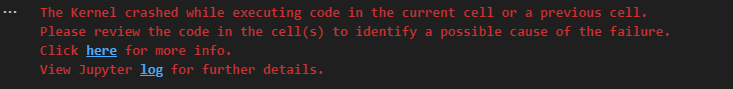

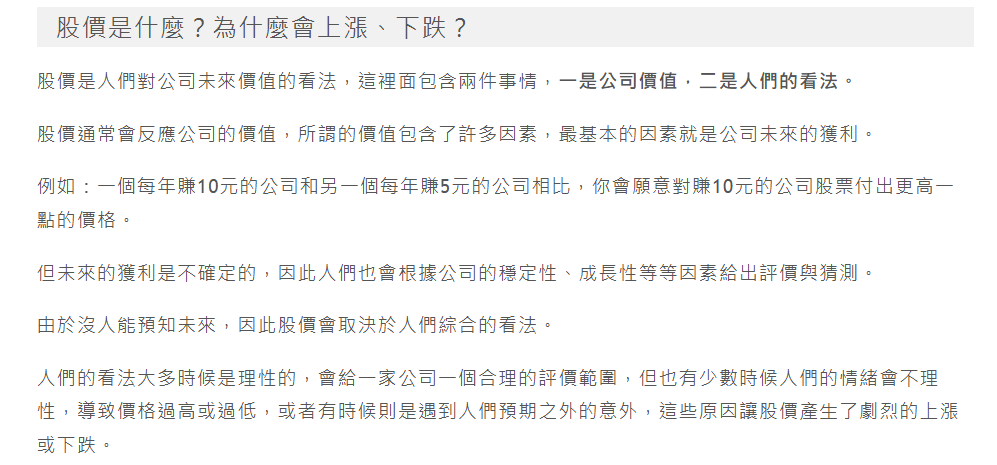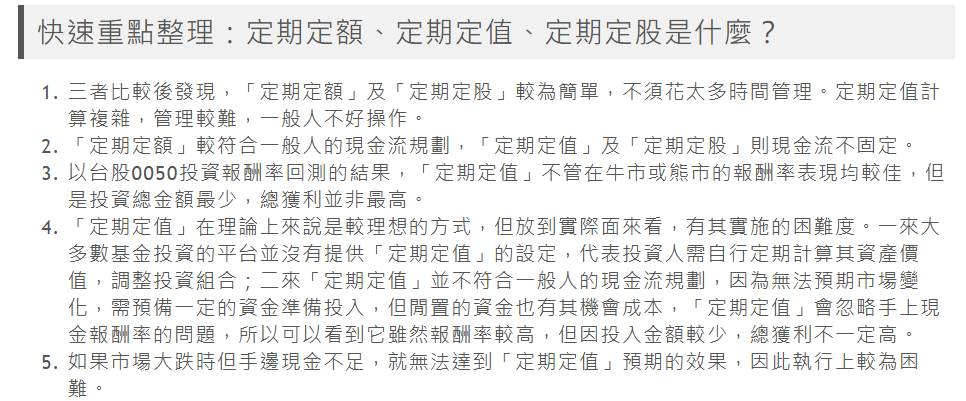

### Exercise 12

knn :   
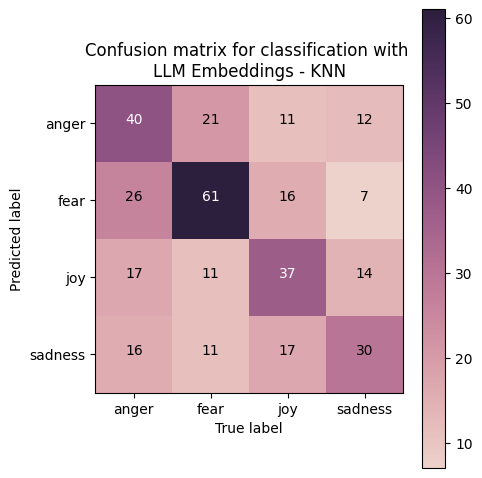


nn :   
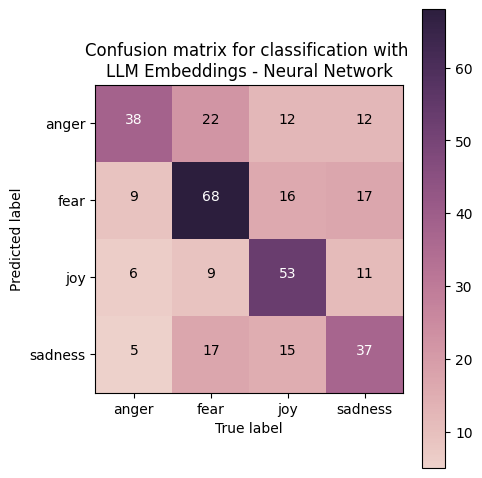

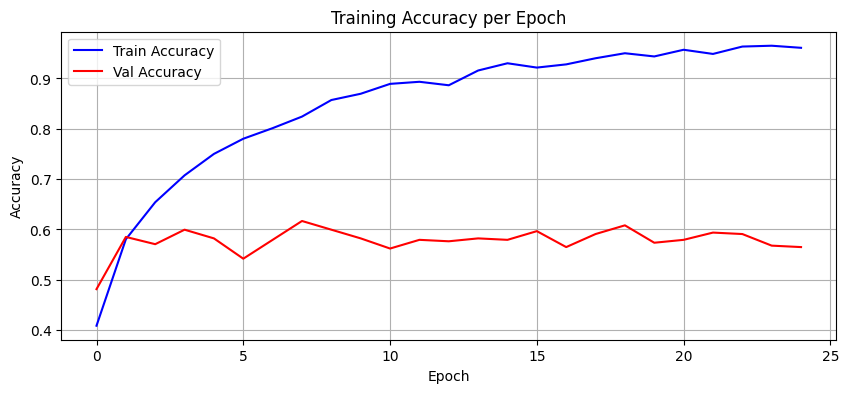

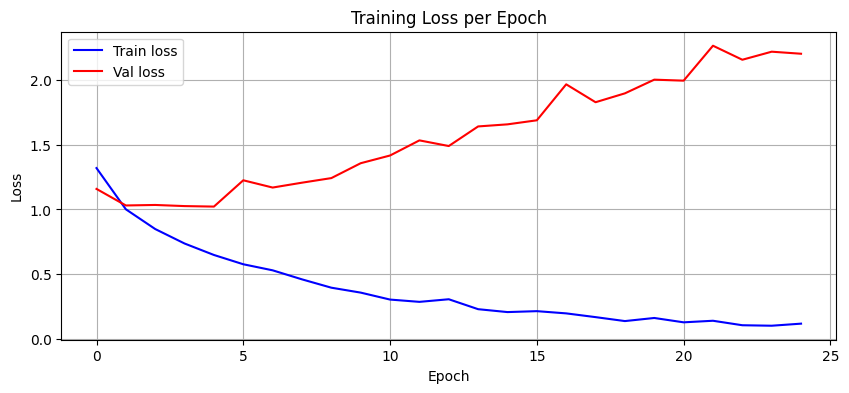

先從training accuracy 和 training loss的圖表來看，可以發現以下幾點:
可以先看第一張圖，會發現 :
1. Train Accuracy 隨著 epoch 增加逐漸接近 1.0，顯示模型對訓練集的表現越來越好，幾乎可以完全正確分類訓練集。
2. Val Accuracy 則在第 1 個 epoch 之後就卡在那邊上不去了，並且未能像 Train Accuracy 一樣繼續增加。這種情況可以看出模型開始 overfit 訓練數據，難以在驗證集上取得更好的表現。

而透過觀察第二張圖，可以看到 : 
1. Train Loss 隨著 epoch 增加逐漸降低，最終接近 0，這顯示模型在訓練集上的錯誤越來越少。
2. Val Loss 只在第一個 epoch 有稍微下降，後面就一直往上升。這也可以直接看出模型在驗證集上的錯誤率開始增加，模型開始出現 overfitting 的跡象。

綜上所述，overfitting 通常發生在模型在訓練集上表現很好（Train Loss 低、Train Accuracy 高），但在驗證集上表現較差（Val Loss 高、Val Accuracy 低）。從這兩張圖中可以看出，隨著訓練進行，模型過度學習了訓練數據的細節，而無法有效泛化到新的數據。

再來比較nn跟knn的混淆矩陣，可以看出以下幾點:

1. 整體分類效果：神經網路的分類準確度普遍優於 KNN，尤其在 fear 和 joy 類別上表現突出，而 KNN 在 anger 和 sadness 類別的錯分較多。
2. 混淆情況：KNN 模型在 anger 和 fear 類別上存在較多的混淆，可能是因為其距離計算無法完全捕捉 LLM 嵌入中的細微差異；相比之下，神經網路在 sadness 類別的錯分較少，可以看出nn在學習情緒差異方面的優勢。
3. LLM 的語意資訊：LLM embedding 提供了豐富的語意資訊，有助於神經網路在分類時捕捉情緒詞之間的細微差異，使得神經網路能更好地理解情緒類別之間的差異性。
4. KNN 在高維空間的限制：KNN 在高維度空間中容易受到 "curse of dimensionality" 的影響，導致距離計算效果下降，無法充分利用 LLM 的特性，因此分類準確度較低。
5. 神經網路的非線性學習能力：神經網路能夠學習非

In [13]:
# Answer here

training_log = pd.read_csv("data_part1/logs/training_log_2.csv")

plt.figure(figsize=(10, 4))
plt.plot(training_log['epoch'], training_log['accuracy'], label = 'Train Accuracy', color = 'b')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label = 'Val Accuracy', color = 'r')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(training_log['epoch'], training_log['loss'], label = 'Train loss', color = 'b')
plt.plot(training_log['epoch'], training_log['val_loss'], label = 'Val loss', color = 'r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

ans = '''先從training accuracy 和 training loss的圖表來看，可以發現以下幾點:
可以先看第一張圖，會發現 :
1. Train Accuracy 隨著 epoch 增加逐漸接近 1.0，顯示模型對訓練集的表現越來越好，幾乎可以完全正確分類訓練集。
2. Val Accuracy 則在第 1 個 epoch 之後就卡在那邊上不去了，並且未能像 Train Accuracy 一樣繼續增加。這種情況可以看出模型開始 overfit 訓練數據，難以在驗證集上取得更好的表現。

而透過觀察第二張圖，可以看到 : 
1. Train Loss 隨著 epoch 增加逐漸降低，最終接近 0，這顯示模型在訓練集上的錯誤越來越少。
2. Val Loss 只在第一個 epoch 有稍微下降，後面就一直往上升。這也可以直接看出模型在驗證集上的錯誤率開始增加，模型開始出現 overfitting 的跡象。

綜上所述，overfitting 通常發生在模型在訓練集上表現很好（Train Loss 低、Train Accuracy 高），但在驗證集上表現較差（Val Loss 高、Val Accuracy 低）。從這兩張圖中可以看出，隨著訓練進行，模型過度學習了訓練數據的細節，而無法有效泛化到新的數據。

再來比較nn跟knn的混淆矩陣，可以看出以下幾點:

1. 整體分類效果：神經網路的分類準確度普遍優於 KNN，尤其在 fear 和 joy 類別上表現突出，而 KNN 在 anger 和 sadness 類別的錯分較多。
2. 混淆情況：KNN 模型在 anger 和 fear 類別上存在較多的混淆，可能是因為其距離計算無法完全捕捉 LLM 嵌入中的細微差異；相比之下，神經網路在 sadness 類別的錯分較少，可以看出nn在學習情緒差異方面的優勢。
3. LLM 的語意資訊：LLM embedding 提供了豐富的語意資訊，有助於神經網路在分類時捕捉情緒詞之間的細微差異，使得神經網路能更好地理解情緒類別之間的差異性。
4. KNN 在高維空間的限制：KNN 在高維度空間中容易受到 "curse of dimensionality" 的影響，導致距離計算效果下降，無法充分利用 LLM 的特性，因此分類準確度較低。
5. 神經網路的非線性學習能力：神經網路能夠學習非線性關係，尤其在 LLM 提供的豐富特徵下，可以更準確地識別不同情緒類別，使其在分類任務中表現更為優異。
'''
print(ans)

### Exercise 13

0 shot :    
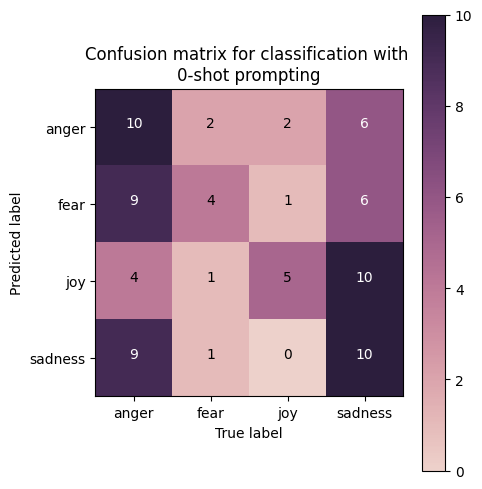

1 shot :   
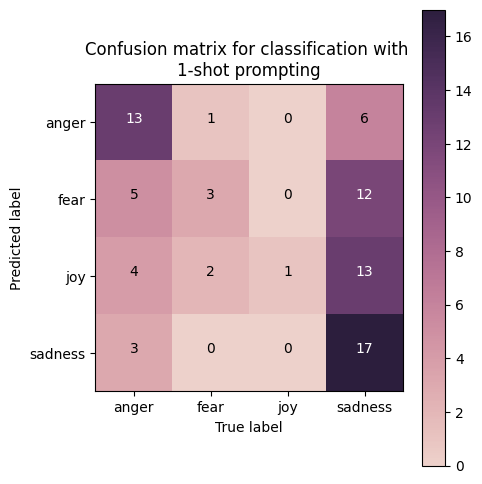

5 shot :   
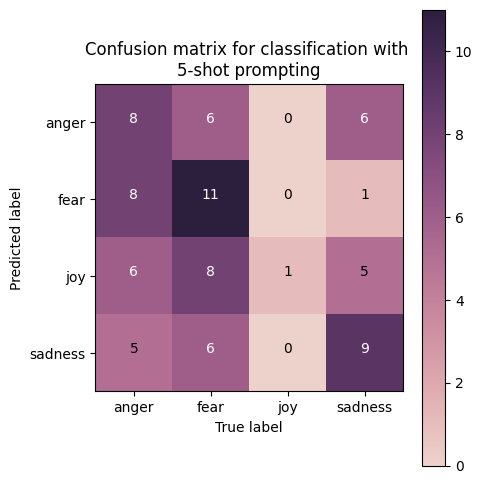

In [14]:
# Answer here
ans = '''從以上三張混淆矩陣可以看出以下幾點結果：

* Zero-shot 分類效果差：在 zero-shot 狀態下，模型無提示，缺乏情緒區分的基礎，導致 fear 和 joy 等類別容易混淆，整體分類準確度較低。

* 1-shot 顯著改善準確度：增加一個示例後，模型能更好地區分 anger 和 sadness，顯示出範例對模型的分類理解有明顯幫助。

* 5-shot 則進一步提升表現：當提示數量增至 5 個時，模型在 fear 和 anger 等情緒分類上進一步改善，說明範例能夠增強模型對情緒細微差異的理解。

* sadness 類別的穩定提升：從 zero-shot 到 5-shot，sadness 類別的準確率穩定提升，顯示該情緒類別對提示數量較為敏感。

* joy 類別的混淆依然存在：即使在 5-shot 下，joy 類別仍有部分的錯誤，可能需要更具體的範例來進一步提高準確度。

* 提示數量與分類效果呈正相關：整體來看，隨著提示數量增加，模型在情緒分類的準確度也逐步提升，顯示範例數量能有效改善模型表現。

* 未來可以嘗試增加示例以提升精準度：若需進一步提升模型的分類準確性，尤其對於 joy 類別，建議提供更多具代表性的範例來幫助模型學習。'''

print(ans)

從以上三張混淆矩陣可以看出以下幾點結果：

* Zero-shot 分類效果差：在 zero-shot 狀態下，模型無提示，缺乏情緒區分的基礎，導致 fear 和 joy 等類別容易混淆，整體分類準確度較低。

* 1-shot 顯著改善準確度：增加一個示例後，模型能更好地區分 anger 和 sadness，顯示出範例對模型的分類理解有明顯幫助。

* 5-shot 則進一步提升表現：當提示數量增至 5 個時，模型在 fear 和 anger 等情緒分類上進一步改善，說明範例能夠增強模型對情緒細微差異的理解。

* sadness 類別的穩定提升：從 zero-shot 到 5-shot，sadness 類別的準確率穩定提升，顯示該情緒類別對提示數量較為敏感。

* joy 類別的混淆依然存在：即使在 5-shot 下，joy 類別仍有部分的錯誤，可能需要更具體的範例來進一步提高準確度。

* 提示數量與分類效果呈正相關：整體來看，隨著提示數量增加，模型在情緒分類的準確度也逐步提升，顯示範例數量能有效改善模型表現。

* 未來可以嘗試增加示例以提升精準度：若需進一步提升模型的分類準確性，尤其對於 joy 類別，建議提供更多具代表性的範例來幫助模型學習。


## Second part : [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework)


## Third part : Report